# TRITON Data in ECCOv4r4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import cartopy.crs as ccrs

In [2]:
ds = xr.open_dataset('../ncfiles/triton_in_eccov4r4.nc')

In [4]:
ds.nbytes/1e9

0.055747848

Since this is only ~56 MB, I'll load this into memory to make plotting faster

In [5]:
ds = ds.load()

## Make plot of locations

In [6]:
ticks = np.linspace(0,len(ds['time'])-1,5)
ticklabels = [str(ds['time'].values[int(tt)])[:10] for tt in ticks]

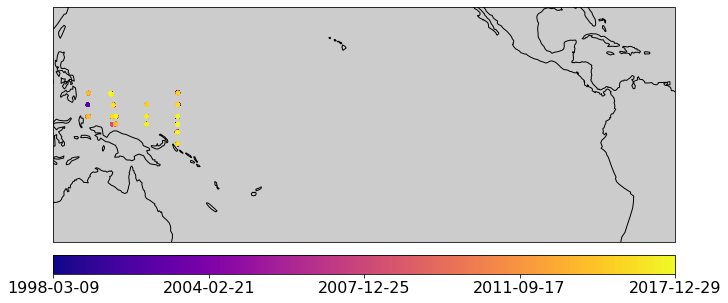

In [7]:
fig, ax = plt.subplots(figsize=(10,6),constrained_layout=True,
                       subplot_kw={'projection':ccrs.Robinson(central_longitude=-180)})

ax.set_extent([-240, -60, -30, 30], crs=ccrs.PlateCarree())

mappable = ax.scatter(ds['lon'],ds['lat'], c=range(len(ds['time'])),
                      marker='.',
                      cmap='plasma',
                      transform=ccrs.PlateCarree())
ax.coastlines()
cbar = fig.colorbar(mappable,ticks=ticks, orientation='horizontal')
cbar.ax.set_xticklabels(ticklabels);

# Slightly grayed out background to see colors
ax.set_facecolor([.8,.8,.8])

fig.savefig('../figures/triton_locations.jpg',bbox_inches='tight',dpi=300)

## Grab a time series of temperature and salinity at a single location

In [8]:
import cmocean # this isn't critical, just for nice colormaps

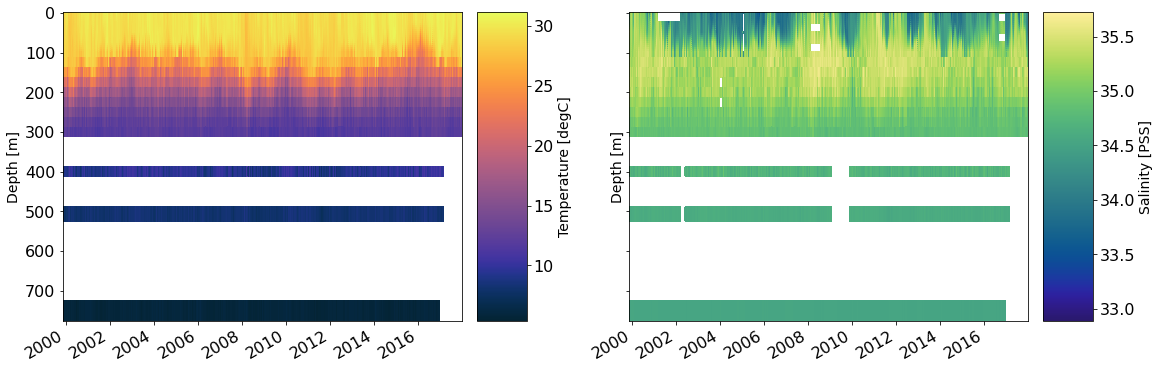

In [16]:
lat_cond = np.abs(ds.lat)<0.5
lon_cond = np.abs(ds.lon-156)<0.5

fig, axs = plt.subplots(1,2,figsize=(16,5), constrained_layout=True, sharey=True)

for fld, cmap, ax in zip(['temperature','salinity'], ['cmo.thermal', 'cmo.haline'], axs):
    
    plotme = ds[fld].where(lat_cond & lon_cond).dropna('time', how='all')
    plotme.plot(x='time', yincrease=False, ax=ax, cmap=cmap)
    ax.set(xlabel='')
fig.savefig('../figures/triton_156E_0N.jpg', bbox_inches='tight', dpi=300)

Note that with the bounds set for `lon_cond` and `lat_cond` as above, there's some variation in the location
of each of these profiles

In [17]:
print(ds['lon'].where(lon_cond & lat_cond).dropna('time', how='all').max().values)
print(ds['lon'].where(lon_cond & lat_cond).dropna('time', how='all').min().values)

156.09
155.85


In [18]:
print(ds['lat'].where(lon_cond & lat_cond).dropna('time', how='all').max().values)
print(ds['lat'].where(lon_cond & lat_cond).dropna('time', how='all').min().values)

0.04
-0.07
